In [19]:
recommendations = """
# Strategic Recommendation for Chip Category

## Insights:

- Mainstream young singles and couples purchase the highest quantity of chips, but spend less per unit.
- Premium older families purchase larger pack sizes more frequently and have the highest average spend per transaction.
- Doritos and Kettle are the top brands among high-spending segments.

## Recommendations:

1. Focus promotional efforts on premium families — they show high loyalty and willingness to spend.
2. Offer larger pack discounts for mainstream segments to increase revenue per transaction.
3. Increase shelf visibility and in-store displays for Doritos and Kettle brands.
4. Consider seasonal campaigns targeted to young singles for smaller packs.

"""

with open("recommendation.md", "w") as file:
    file.write(recommendations)


# **QUANTIUM TASK - 1**

# **DATA LOADING AND GETTING INFO**

In [11]:
import pandas as pd #panas to access and work upon given data
import matplotlib.pyplot as plt #matplot used to plot or visualize the data
customers = pd.read_csv("/content/QVI_purchase_behaviour.csv")
transactions = pd.read_excel("/content/QVI_transaction_data.xlsx")

customers.head() #to show top 5 rows and head of data
transactions.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [6]:
customers.info() #help know number of rows columns and datatypes
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
me

So there are 72637 rows and 3 columns in customer purchase data
and 264836 rows and 8 columns in transacion data

In [8]:
customers.isnull().sum() #checking missing values
transactions.isnull().sum()

,0
DATE,0
STORE_NBR,0
LYLTY_CARD_NBR,0
TXN_ID,0
PROD_NBR,0
PROD_NAME,0
PROD_QTY,0
TOT_SALES,0


So there are no missing values in the above data

In [9]:
customers.duplicated().sum() #checking duplicate values in the data
transactions.duplicated().sum()

np.int64(1)

# **DATA CLEANING **

MAIN AND IMPORTANT PART OF ANY DATA PROCESS

In [10]:
transactions.drop_duplicates(inplace=True) #removing duplicate values
transactions['DATE'] = pd.to_datetime(transactions["DATE"]) #coverting to date time period easy to access and understand
transactions.dropna(subset=['LYLTY_CARD_NBR'], inplace=True)

In [12]:
# 1. Extract PACK_SIZE from product name
transactions['PACK_SIZE'] = transactions['PROD_NAME'].str.extract(r'(\d{2,4})g').astype(float)

# 2. Extract BRAND (first word in product name)
transactions['BRAND'] = transactions['PROD_NAME'].str.split().str[0]


In [13]:
chips = transactions[transactions['PROD_NAME'].str.contains("Chips", case=False)] #we have focus mainly upon chips
merged_df = pd.merge(chips, customers, on='LYLTY_CARD_NBR')
merged_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170.0,Smiths,MIDAGE SINGLES/COUPLES,Budget
1,43601,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,330.0,Smiths,MIDAGE SINGLES/COUPLES,Budget
2,43602,7,7215,7176,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,330.0,Smiths,MIDAGE SINGLES/COUPLES,Budget
3,43600,19,19272,16686,44,Thins Chips Light& Tangy 175g,1,3.3,175.0,Thins,MIDAGE SINGLES/COUPLES,Budget
4,43603,45,45220,41651,22,Thins Chips Originl saltd 175g,1,3.3,175.0,Thins,MIDAGE SINGLES/COUPLES,Budget


In [14]:
#by using merge we can fin avg spend per segment
merged_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].mean()

LIFESTAGE               PREMIUM_CUSTOMER
MIDAGE SINGLES/COUPLES  Budget              6.543033
                        Mainstream          7.005541
                        Premium             6.484144
NEW FAMILIES            Budget              6.688576
                        Mainstream          6.673141
                        Premium             6.663036
OLDER FAMILIES          Budget              6.779862
                        Mainstream          6.784753
                        Premium             6.692716
OLDER SINGLES/COUPLES   Budget              6.820714
                        Mainstream          6.760017
                        Premium             6.853918
RETIREES                Budget              6.831807
                        Mainstream          6.747235
                        Premium             6.786868
YOUNG FAMILIES          Budget              6.744285
                        Mainstream          6.705693
                        Premium             6.783174
YOUNG SINGLES/COUPLES   Budget              6.155436
                        Mainstream          6.981297
                        Premium             6.171185
Name: TOT_SALES, dtype: float64

In [15]:
#total chips bought can be
merged_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].sum()

LIFESTAGE               PREMIUM_CUSTOMER
MIDAGE SINGLES/COUPLES  Budget              1849
                        Mainstream          4304
                        Premium             2821
NEW FAMILIES            Budget              1064
                        Mainstream           773
                        Premium              562
OLDER FAMILIES          Budget              8429
                        Mainstream          5226
                        Premium             4041
OLDER SINGLES/COUPLES   Budget              6628
                        Mainstream          6672
                        Premium             6365
RETIREES                Budget              5542
                        Mainstream          7554
                        Premium             4574
YOUNG FAMILIES          Budget              6841
                        Mainstream          4705
                        Premium             4248
YOUNG SINGLES/COUPLES   Budget              3184
                        Mainstream          7242
                        Premium             2250
Name: PROD_QTY, dtype: int64

# VISUALIZATIONS TO UNDERSTAND **PROPERLY**

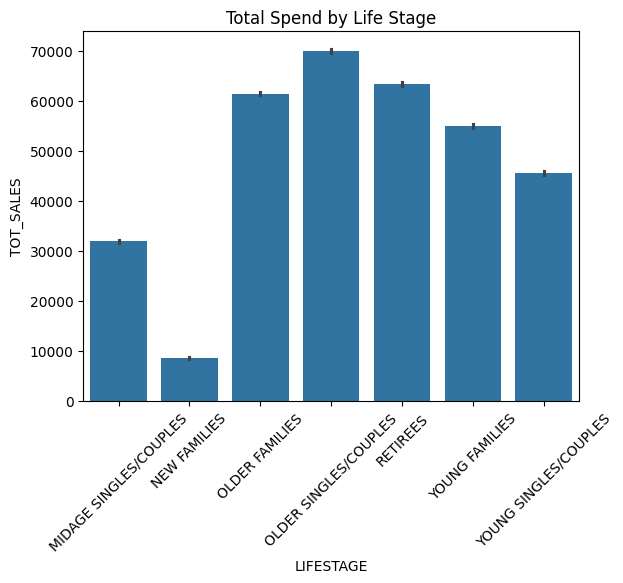

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(data=merged_df, x='LIFESTAGE', y='TOT_SALES', estimator=sum)
plt.title("Total Spend by Life Stage")
plt.xticks(rotation=45)
plt.show()

By above bar greph we can say:
Mainstream young singles buy most chips but spend the least per trip.
Premium retired customers buy larger packs.

In [17]:
# Save the merged chip dataset
merged_df.to_csv("merged_chip_data.csv", index=False)